## **Problem Description**
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

## **Steps Involved:**
- Importing Libraries
- Importing the Dataset
- Exploratory Data Analysis
> * Univariate Analysis
> * Bivariate Analysis
- Data preprocessing 
> * Outlier Handling
> * Feature Selection and Standardization
- Modeling 
- Evaluation
- Fine tuning using GridSearchCV
- Conclusion

## **Importing Libraries**

In [0]:
#importing the necessary packages to process or plot the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew

**Read the data_csv file**

In [0]:
# with the help of pandas read the csv file  and store in dataframe.
data = pd.read_csv('/content/abalone.csv')


In [125]:
# using the head function see what is originlly present in the dataset
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Shape of the dataset**

In [126]:
# shape method gives the shape of dataframe
data.shape

(4177, 9)

**Size of the dataset**

In [127]:
#size
data.size

37593

**Description of all particular column of the dataset**

In [128]:
# descrbe function gives the detailed description of dataframe
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [0]:
# important - predicting age (ie. Age = 1.5+rings ,as per UCI dataset Description)
data['age'] = data['Rings']+1.5
data = data.drop('Rings', axis = 1)

## **Exploratory Data Analysis**


## **Univariate analysis**
In this section the distribution of each attribute needs to be  analyzed individually. You need to start analyzing the distribution of the target attribute Rings. The rest of the attributes are divided in groups for convenience of the analysis: a group called Size, containing attributes that represents the dimensions of an abalone, a group Weight, containing the different weight attributes and a third group composed only of the Sex 
attribute. Analyze The continous or quantitative attributes using histograms and boxplots, while analyze categorical attributes  using barplot





In [130]:
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))


This dataset has 4177 observations with 9 features.


In [131]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [132]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000




Key insights :

        - No missing values in the dataset
        - All numerical features but 'sex'
        - Though features are not normaly distributed, are close to normality
        - None of the features have minimum = 0 except Height (requires re-check)
        - Each feature has difference scale range



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae6dd2e710>,
      dtype=object)

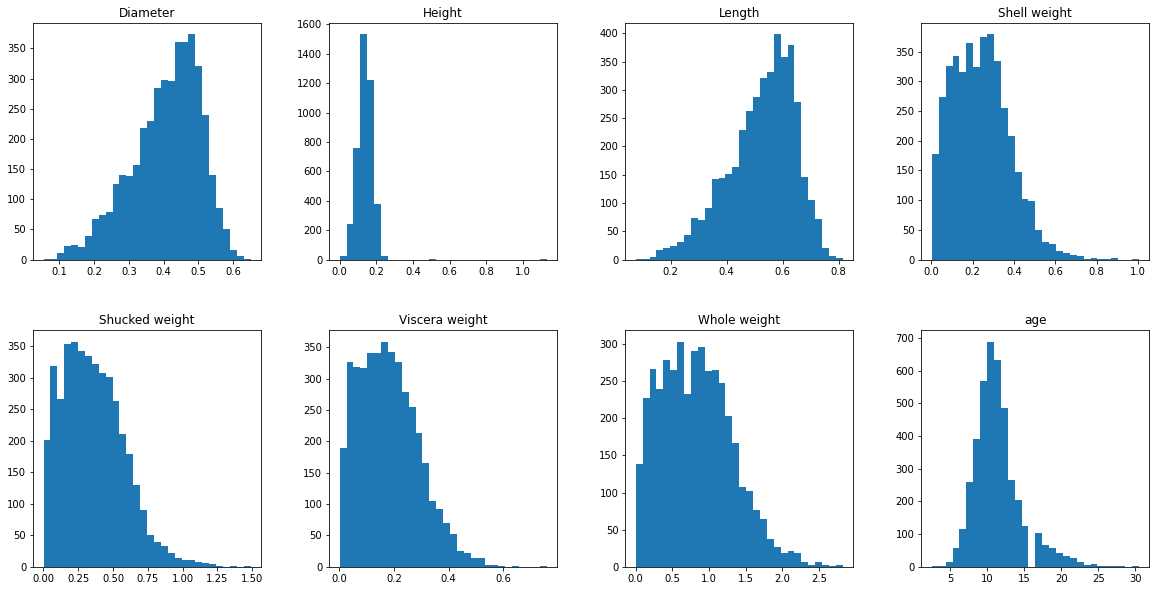

In [133]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [0]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns


In [135]:
numerical_features


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [136]:
categorical_features

Index(['Sex'], dtype='object')

In [137]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)


,Features,Skewness degree
2,Height,3.127694
7,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643




For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

    - Height has highest skewedness followed by age, Shucked weight (can be cross verified through histogram plot)



In [138]:
# Missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
age,0,0.0
Shell weight,0,0.0
Viscera weight,0,0.0
Shucked weight,0,0.0
Whole weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0




No missing values

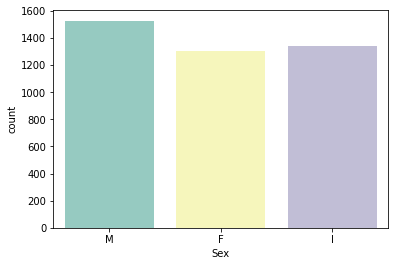

In [139]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

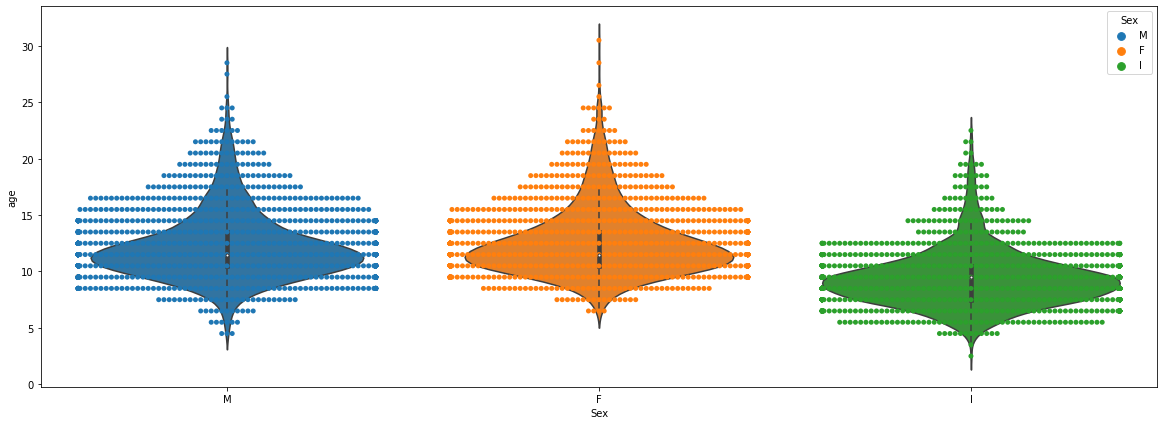

In [140]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = data)

*  Male : age majority lies in between 7.5 years to 19 years
*  Female: age majority lies in between 8 years to 19 years
*  Immature: age majority lies in between 6 years to < 10 years

In [141]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


## **Multivariate Analysis**
You have to analyze how the dataset attributes are related and how the independent variables influences the target variable.
Draw your inferences accordingly,as this part would help you in better understanding of Dimensinality Reduction or Feature Selection. 

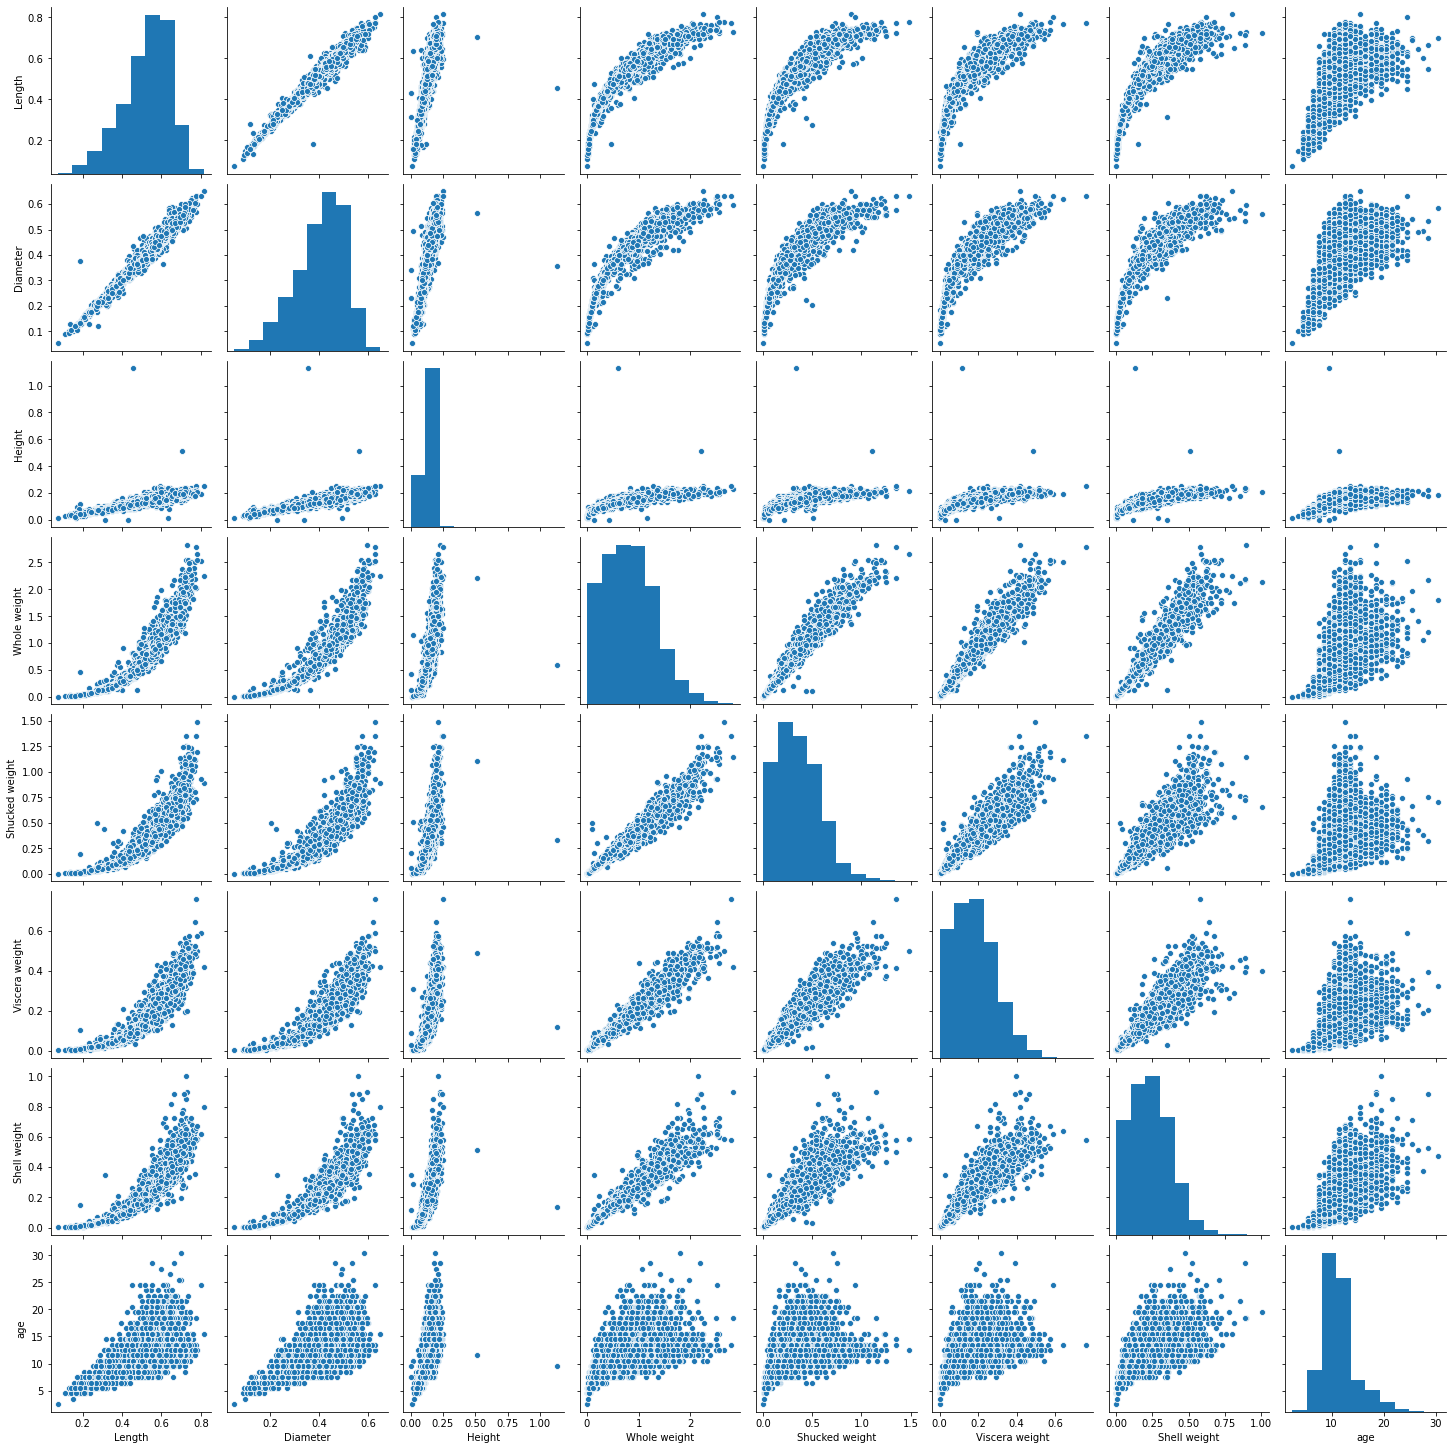

In [142]:


sns.pairplot(data[numerical_features])





key insights length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight


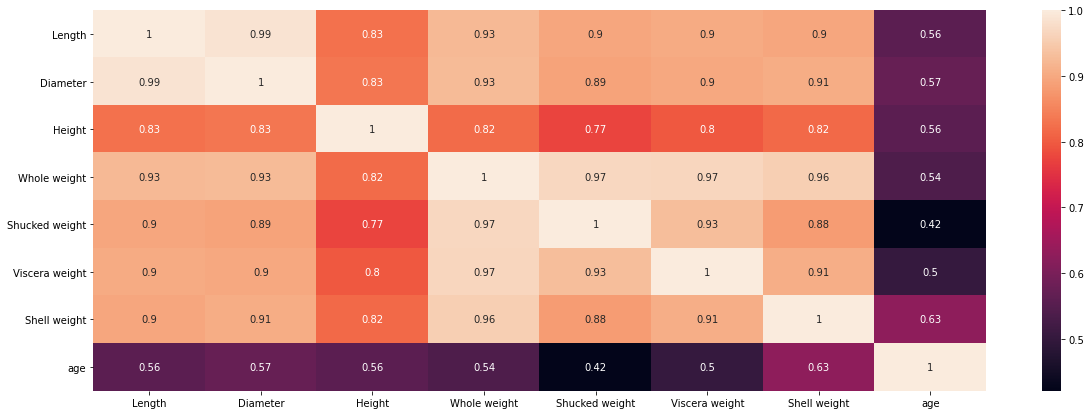

In [143]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

* Whole Weight is almost linearly varying with all other features except age
* Height has least linearity with remaining features
* Age is most linearly proprtional with Shell Weight followed by Diameter and length
* Age is least correlated with Shucked Weight



In [0]:
#You can also go for a more detailed EDA - try yourself



---




# **Data Preprocessing**

### **Outlier handling**


*   For each attribute vs Age(rings) plot and identify outliers
*   Drop them accordingly

**eg.** Attribute **Viscera weight(x-axis) Vs Age(y-axis)**

![alt text](https://www.kaggleusercontent.com/kf/19694536/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..CacRnP_l-DIo0cAsfOaF_A.qcxUhlc4xnBtRSV2oOsawt9xRnG8QRU_OMfUDrM8G_dCCiSyhLdjltSr3fm5s-U7E2CReE2g1c3_ixPmhbsdaZtdA69lcosoYz2PDisdxhS0qLc6rgGq-Zz0o_w5tKwj3li7NH9dTcyZPBHFazq9KSlg8BRmOidnaEkRmcyK8XutoDN7gsIKSywIlzpfwmhXzYvLsHAH2QR3-yxKiO6AAA-6WqsNBg099aSJnftY0zhMLatVtF0_E26iqElfOjHUOLUeNZyq4_290wkmuAWyd-ImFqsygQWWc0Zd8NrgzYV221leeOo5rYH76OZs42xUw-JJvOtDmhT_L6kXnW7ebSzqViclW63WUHBIKTvIOkgnj9xDSwOf_tPs3WM4-N1hQRpRMjuewHfXDYdUCJynb4aoyWQAiHpGiAMo0OxkfbsSsXVsclt6lBn8F5iJPeV8TZhZRUQwoZDtXJIW__ntHU1uXJPtv0QFS-08cF-F5Y_EqHCL87vmJY6Hgz4s_XXZc0TI0GE-vBCcQ_MJVT5qvbTijr6c3FPICP7dqIIxKZ3ArceuIKb2uf2P-ilJmajaOnjwiNs-CanKq_x6fz68eZzqnVkM_l8T8HF8tQm58TjP0_EqexRahhImflcdStyAoswM6-tlPbtsYa854AVWnhJz-SdjVp0rUbqhp-vF3Qk.VZThIdTUBDUoUavo9kr8YA/__results___files/__results___32_0.png)

* from above visualisation inference we need to 
 Drop the df where age<20 and weight>0.5  


In [0]:
# todo : You need to find and remove the outliers in the dataset.
data = pd.get_dummies(data)
dummy_data = data.copy()

In [164]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


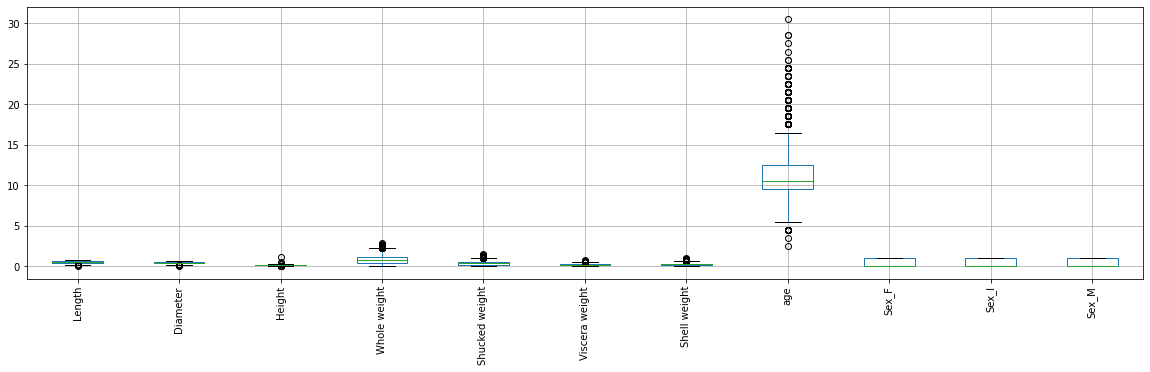

In [146]:
data.boxplot( rot = 90, figsize=(20,5))

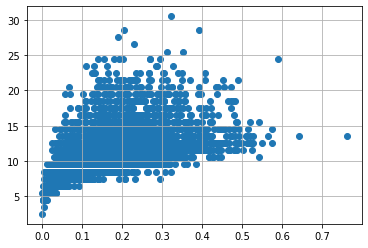

In [147]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [0]:
# outliers removal
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)


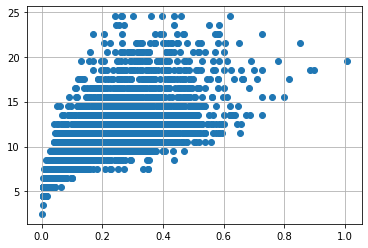

In [149]:
#shell Weight
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [0]:
data.drop(data[(data['Shell weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell weight']<0.8) & (data['age'] > 25)].index, inplace=True)

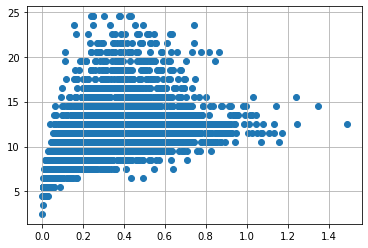

In [151]:
#Shucked weight
var = 'Shucked weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)


In [0]:
data.drop(data[(data['Shucked weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked weight']<1) & (data['age'] > 20)].index, inplace=True)


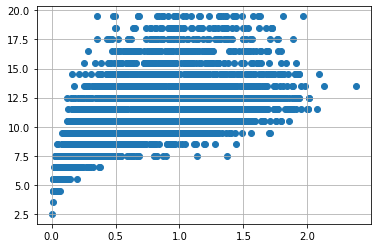

In [153]:
var = 'Whole weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [0]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)

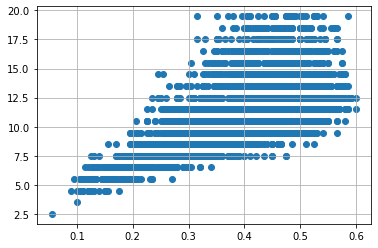

In [155]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)


In [0]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)



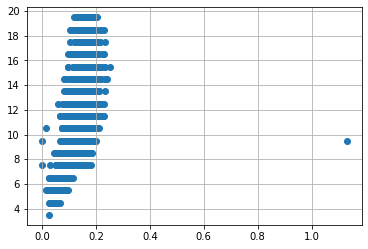

In [157]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)


In [0]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)


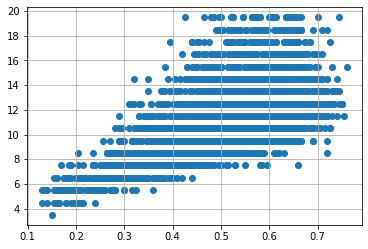

In [159]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)


In [0]:


data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)



## **Feature Selection and Standardization**
* Using StandardScaler method , standardize the dataset.
* Using any Feature Selecion Methods, select the best features.
* Perform a Test-train split

In [0]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import  OrdinalEncoder

# todo : Perform preprocessing

In [0]:
X = data.drop('age', axis = 1)
y = data['age']


In [166]:
#standardize the dataset
standardScale = StandardScaler()
standardScale.fit_transform(X)


array([[-0.53701309, -0.39082366, -1.12698145, ..., -0.66579302,
        -0.70803622,  1.33638076],
       [-1.42965864, -1.4205279 , -1.26123393, ..., -0.66579302,
        -0.70803622,  1.33638076],
       [ 0.10059087,  0.17551367, -0.05296168, ...,  1.50196828,
        -0.70803622, -0.74828973],
       ...,
       [ 0.6956879 ,  0.741851  ,  1.82657293, ..., -0.66579302,
        -0.70803622,  1.33638076],
       [ 0.90822255,  0.84482142,  0.34979574, ...,  1.50196828,
        -0.70803622, -0.74828973],
       [ 1.63084038,  1.56561439,  1.55806799, ..., -0.66579302,
        -0.70803622,  1.33638076]])

In [0]:
#Select best features

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)


In [0]:
#test-train split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

## **Model Selection**

Compare the performance of different Regressors
* Linear Regressor
* SVR
* RandomForest Regressor
* ElasticNet Regression
* Lasso Regression
* Kernel Ridge Regression
* Gradient Boosting Regression
* XGBoost
* LightGBM

Use GridSearch to Finetune the selected model

In [0]:
#below maybe some models are not tried, you can try yourself

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR

from sklearn import model_selection

In [186]:

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4)]
results = []
names = ['LR','Ridge','svm','RF','GB','KNN']
print("Model :TrainScore:,TestScore:")
for model,name in zip(models,names):
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Model :TrainScore:,TestScore:
LR: 0.522873 (0.034267)
Ridge: 0.515273 (0.034184)
svm: 0.500602 (0.036080)
RF: 0.541817 (0.030338)
GB: 0.550557 (0.030588)
KNN: 0.495040 (0.060474)


Each model perform fairly equal

In [0]:
#you can select the best model for further Investigation.



---



## Conclusion